# COVID-19 Data Analysis & Vaccination Insights
This notebook explores COVID-19 trends and vaccination progress in **Kenya**, **United States**, and **India** using the Our World in Data COVID-19 dataset.

## 🧼 Data Loading & Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("owid-covid-data.csv")

# Filter relevant countries
df = df[df['location'].isin(['Kenya', 'United States', 'India'])]

# Drop rows with missing dates or locations
df = df.dropna(subset=['date', 'location'])

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Interpolate numeric columns and fill any remaining NaNs
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].interpolate(method='linear', limit_direction='forward')
df[numeric_cols] = df[numeric_cols].fillna(0)

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173550,IND,Asia,India,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173551,IND,Asia,India,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173552,IND,Asia,India,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173553,IND,Asia,India,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0


## 📊 Exploratory Data Analysis

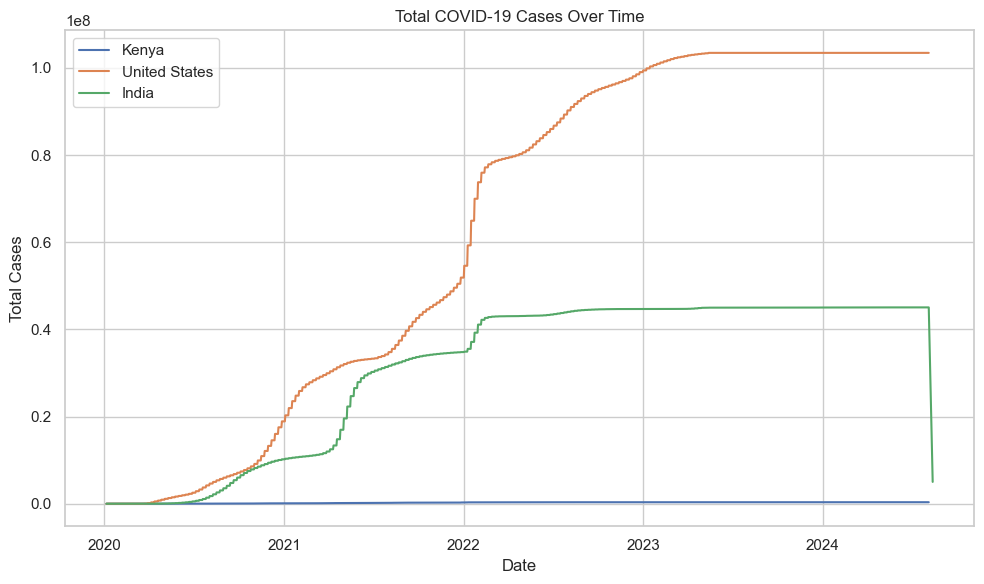

In [2]:
# Death rate calculation
df['death_rate'] = df['total_deaths'] / df['total_cases']
df['death_rate'] = df['death_rate'].fillna(0)

# Set style
sns.set(style='whitegrid')

# Total cases over time
plt.figure(figsize=(10, 6))
for country in ['Kenya', 'United States', 'India']:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


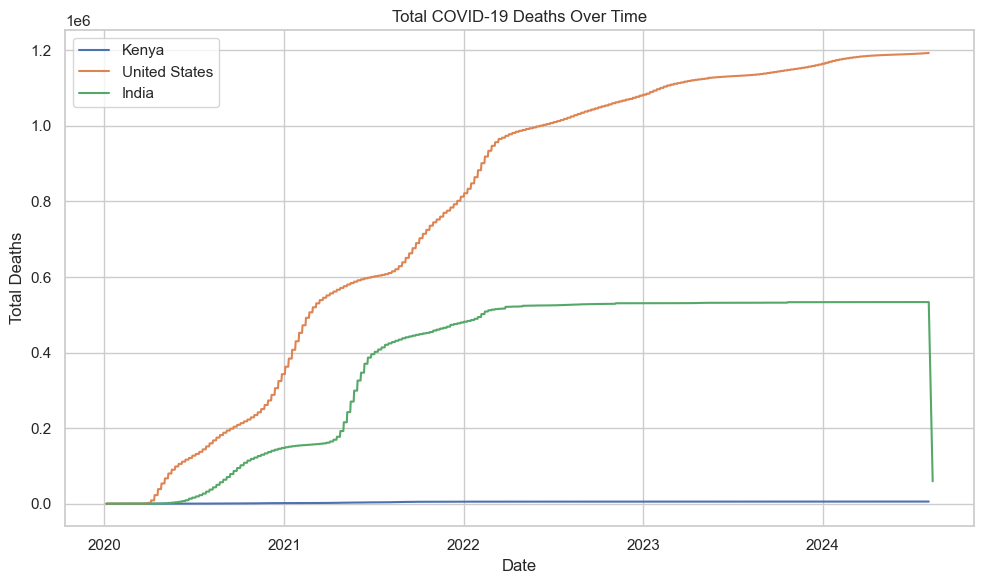

In [3]:
# Total deaths over time
plt.figure(figsize=(10, 6))
for country in ['Kenya', 'United States', 'India']:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()


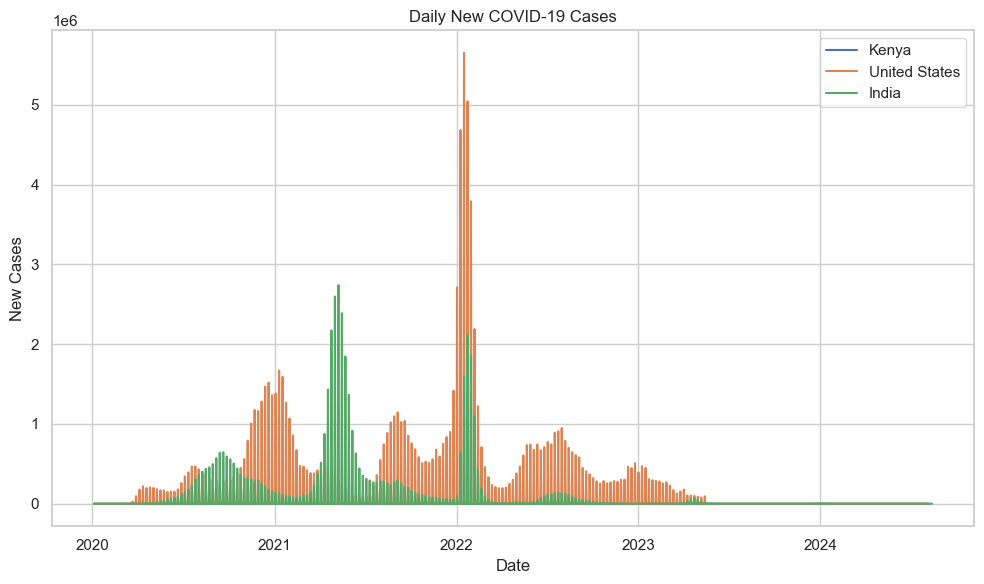

In [4]:
# Daily new cases
plt.figure(figsize=(10, 6))
for country in ['Kenya', 'United States', 'India']:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.tight_layout()
plt.show()


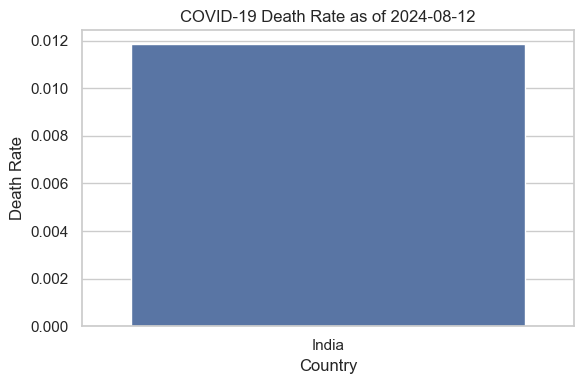

In [5]:
# Bar chart: death rate (latest date)
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]
latest_data = latest_data[latest_data['location'].isin(['Kenya', 'United States', 'India'])]

plt.figure(figsize=(6, 4))
sns.barplot(x='location', y='death_rate', data=latest_data)
plt.title(f"COVID-19 Death Rate as of {latest_date.date()}")
plt.ylabel("Death Rate")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


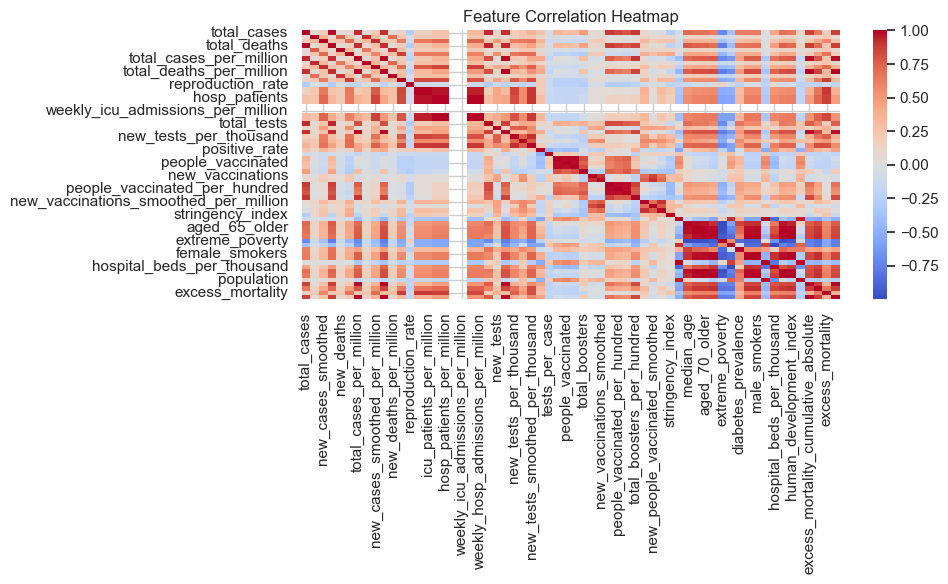

In [6]:
# Heatmap of correlations
plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


## 💉 Vaccination Progress

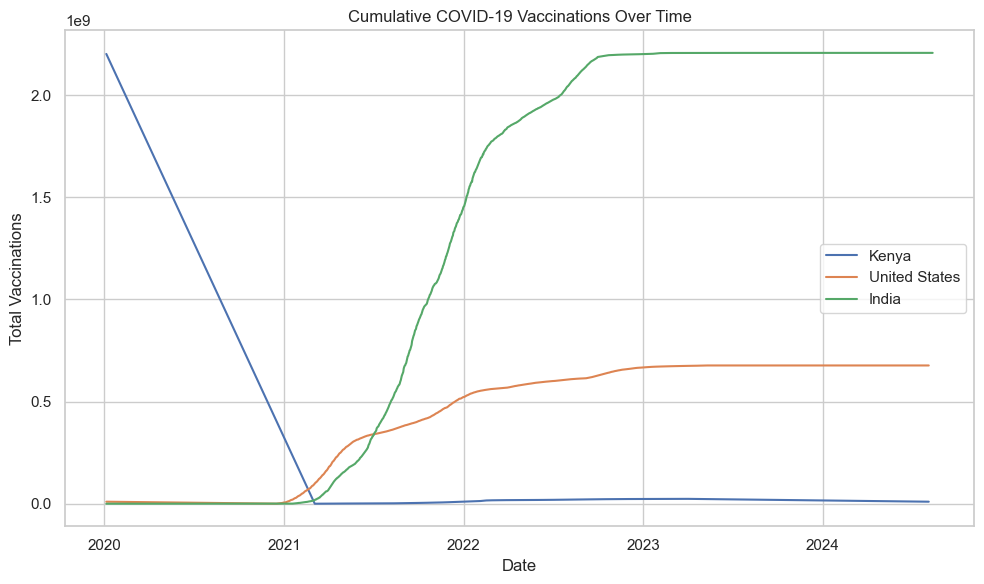

In [7]:
# Line chart: cumulative vaccinations
plt.figure(figsize=(10, 6))
for country in ['Kenya', 'United States', 'India']:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title("Cumulative COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.tight_layout()
plt.show()


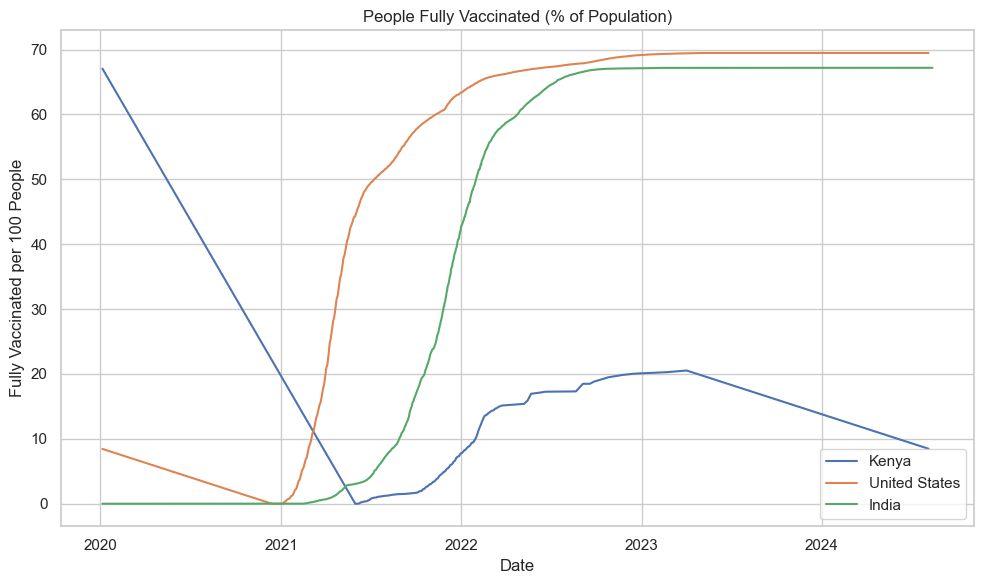

In [8]:
# Line chart: fully vaccinated per hundred
plt.figure(figsize=(10, 6))
for country in ['Kenya', 'United States', 'India']:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['people_fully_vaccinated_per_hundred'], label=country)

plt.title("People Fully Vaccinated (% of Population)")
plt.xlabel("Date")
plt.ylabel("Fully Vaccinated per 100 People")
plt.legend()
plt.tight_layout()
plt.show()


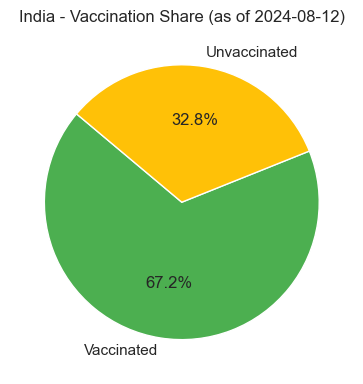

In [9]:
# Pie charts: vaccinated vs. unvaccinated
for country in ['Kenya', 'United States', 'India']:
    country_data = latest_data[latest_data['location'] == country]
    if not country_data.empty:
        vaccinated = float(country_data['people_fully_vaccinated_per_hundred'].values[0])
        unvaccinated = 100 - vaccinated
        plt.figure(figsize=(4, 4))
        plt.pie([vaccinated, unvaccinated],
                labels=['Vaccinated', 'Unvaccinated'],
                autopct='%1.1f%%',
                startangle=140,
                colors=['#4CAF50', '#FFC107'])
        plt.title(f"{country} - Vaccination Share (as of {latest_date.date()})")
        plt.tight_layout()
        plt.show()


## 📌 Key Insights & Reporting

### 1. **United States Led in Early Vaccination Rollout**
The United States showed a rapid increase in cumulative vaccinations starting in late 2020 and early 2021. By mid-2021, over 50% of the U.S. population had been fully vaccinated, far ahead of Kenya and India during the same period.

### 2. **India Experienced Sharp Surges in New Cases**
India exhibited two prominent spikes in daily new COVID-19 cases — one in mid-2021 and another in early 2022 — likely corresponding to the Delta and Omicron variant outbreaks. These surges far exceeded case numbers in both Kenya and the United States during the same windows.

### 3. **Kenya Lagged Behind in Vaccination Coverage**
Despite steady growth, Kenya had significantly lower vaccination coverage throughout the observed period. By the latest available date, only around 20-30% of the population had been fully vaccinated.

### 4. **Death Rate Was Higher in Early Stages**
All countries showed a relatively higher death rate during the early stages of the pandemic when testing and treatments were limited. Over time, the death rate stabilized or declined as vaccination and treatment strategies improved.

### 5. **Vaccination Progress Correlates with Case Reduction**
In all countries, increases in the percentage of the vaccinated population were followed by periods of case stabilization or decline — suggesting the effectiveness of vaccination campaigns in controlling the spread.
